In [3]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
filename = "D:\data\cmip6-lumip\pr_Amon_BCC-CSM2-MR_piControl_r1i1p1f1_gn_185001-244912.nc"
dset = xr.open_dataset(filename)
print(dset)
print(dset['pr'])

In [4]:
clim = dset['pr'].mean('time',keep_attrs = True)

In [5]:
type(clim.data)

numpy.ndarray

In [6]:
clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day'
print(clim)

<xarray.DataArray 'pr' (lat: 160, lon: 320)>
array([[0.20134042, 0.2005159 , 0.19976537, ..., 0.20400465, 0.20306769,
        0.20213257],
       [0.18827241, 0.18678756, 0.18524257, ..., 0.19317225, 0.19150853,
        0.18984779],
       [0.17538641, 0.17326981, 0.17127633, ..., 0.18201382, 0.17970281,
        0.17755497],
       ...,
       [0.47671185, 0.47745204, 0.47849786, ..., 0.47409351, 0.47502878,
        0.47584468],
       [0.45608086, 0.456746  , 0.45748976, ..., 0.4541156 , 0.45480581,
        0.45547547],
       [0.4610966 , 0.46135238, 0.46164725, ..., 0.46055027, 0.46125298,
        0.46113023]])
Coordinates:
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          mm/day
    original_name:  PRECT
    cell_met

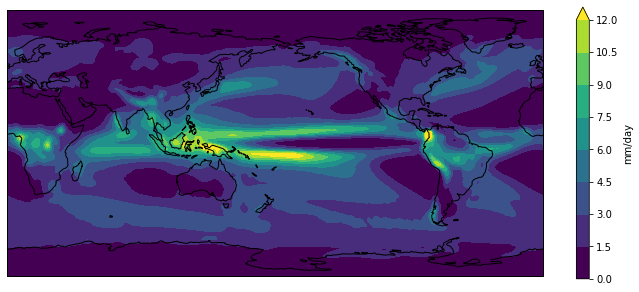

In [9]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.plot.contourf(ax=ax,
                    levels = np.arange(0,13.5,1.5),
                    extend='max',
                    transform=ccrs.PlateCarree(),
                    cbar_kwargs={'label':clim.units})
ax.coastlines()
plt.show()